## Exploring Zillow Data

In [1]:
import numpy as np
import pandas as pd
import env
import wrangle
import explore
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Acquire the data
zillow = wrangle.wrangle_zillow()

In [3]:
#Take a quick look at the data and get individual variable distributions
zillow.head()

,bedroom_count,bathroom_count,home_area,county,tax_value,tax_amount,state,county_tax_rate
0,3,2.0,1316,Los Angelas,205123,2627.48,California,0.012809
1,3,2.0,1458,Los Angelas,136104,2319.90,California,0.017045
2,2,1.0,1421,Los Angelas,35606,543.69,California,0.015270
3,4,3.0,2541,Orange,880456,9819.72,California,0.011153
4,3,2.0,1491,Los Angelas,107110,1399.27,California,0.013064


In [4]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23004 entries, 0 to 28123
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    23004 non-null  int64  
 1   bathroom_count   23004 non-null  float64
 2   home_area        23004 non-null  int64  
 3   county           23004 non-null  object 
 4   tax_value        23004 non-null  int64  
 5   tax_amount       23004 non-null  float64
 6   state            23004 non-null  object 
 7   county_tax_rate  23004 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.6+ MB


In [5]:
zillow.describe()

,bedroom_count,bathroom_count,home_area,tax_value,tax_amount,county_tax_rate
count,23004.000000,23004.000000,23004.000000,2.300400e+04,23004.000000,23004.000000
mean,3.176143,2.069227,1691.850504,3.960398e+05,4824.871216,0.012801
std,0.807958,0.662593,596.746175,2.603727e+05,2969.244909,0.001892
min,1.000000,1.000000,300.000000,1.543300e+04,138.540000,0.006431
25%,3.000000,2.000000,1246.000000,1.955600e+05,2624.810000,0.011670
50%,3.000000,2.000000,1582.000000,3.542750e+05,4370.335000,0.012328
75%,4.000000,2.500000,2050.000000,5.409210e+05,6428.387500,0.013482
max,5.000000,3.000000,4065.000000,1.434802e+06,16153.420000,0.019236


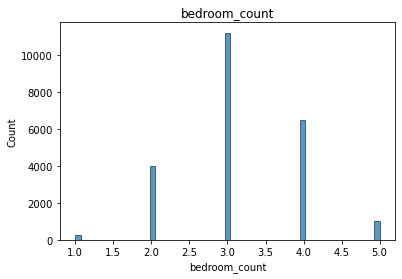

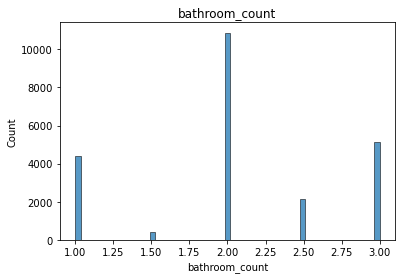

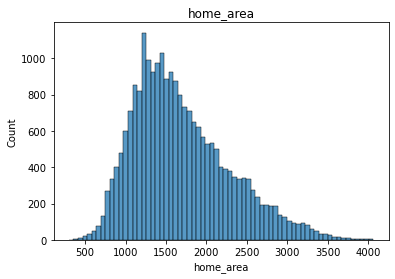

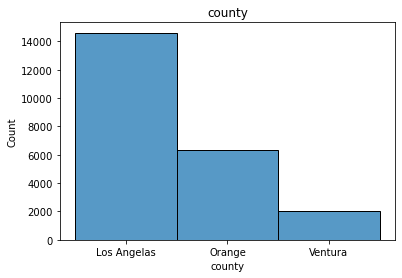

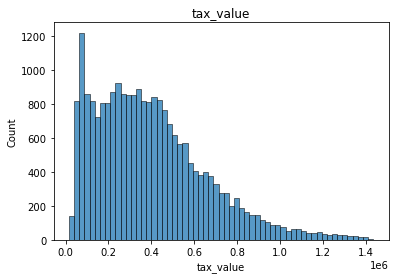

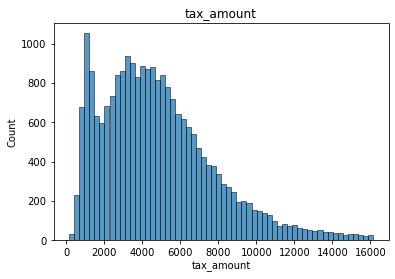

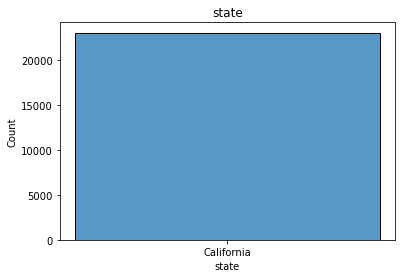

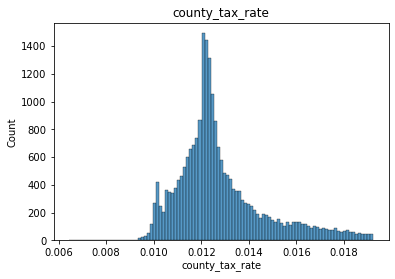

In [6]:
wrangle.get_dists(zillow)

In [7]:
#Split the data into train, validate, test
train, validate, test = wrangle.train_validate_test_split(zillow)

In [10]:
#Take a look at the train data set. Some unusable columns were removed
train.head()

,bedroom_count,bathroom_count,home_area,tax_value
23141,4,3.0,3044,648902
2687,4,3.0,2398,967517
27752,3,2.0,1088,240147
6339,3,2.0,1598,564000
4036,3,3.0,2472,769000


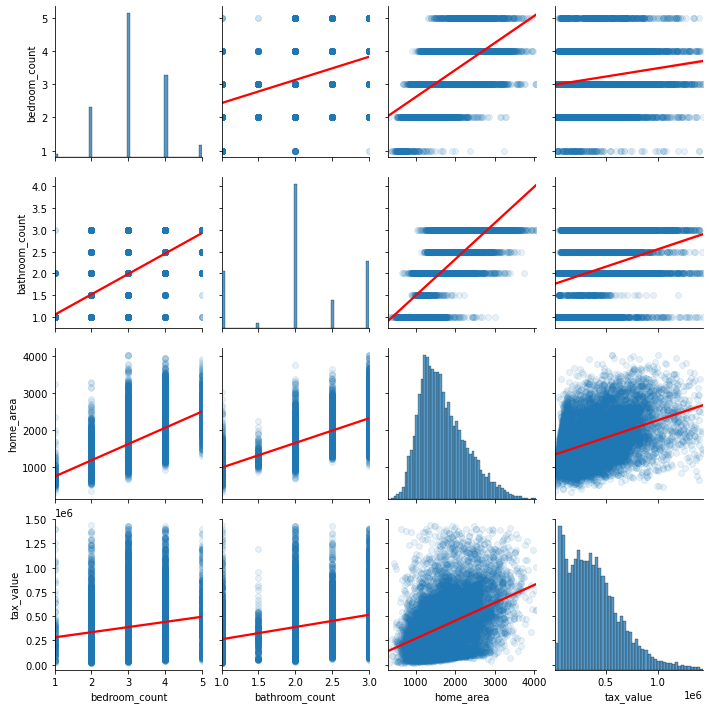

In [9]:
#Now use the train data set for exploration
explore.get_pairwise_charts(train)

Key Takeaways:

* bedroom count and bathroom count have a weak positive relationship with tax_value.
* home_area has a much stronger positive linear relationship with tax_value.
* bedroom count and bathroom count have positive linear relationships with home_area, but that is expected.

## Statistical Testing

__Hypothesis 1__

$H_0$: bedroom_count is not linearly correlated with tax_value

$H_a$: bedroom_count is linearly correlated with tax_value

In [11]:
alpha = 0.05

In [13]:
corr, p = stats.pearsonr(train.bedroom_count, train.tax_value)
corr, p

(0.16293899010302537, 2.377759271934025e-77)

In [14]:
#Is p < alpha?
def is_significant(p):
    if p < alpha:
        print('p is less than alpha, so we reject the null hypothesis.')
    else:
        print('p is not less than alpha, so we fail to reject the null hypothesis.')

In [16]:
is_significant(p)

p is less than alpha, so we reject the null hypothesis.


__Hypothesis 2__

$H_0$: bathroom_count is not linearly correlated with tax_value.
    
$H_a$: bathroom_count is linearly correlated with tax_value.

In [18]:
alpha = 0.05

In [19]:
corr, p = stats.pearsonr(train.bathroom_count, train.tax_value)
corr, p

(0.3172892951135475, 3.769935354504302e-299)

In [20]:
is_significant(p)

p is less than alpha, so we reject the null hypothesis.


__Hypothesis 3__

$H_0$: home_area is not linearly correlated with tax_value.

$H_a$: home_area is linearly correlated with tax_value.

In [21]:
alpha = 0.05

In [22]:
corr, p = stats.pearsonr(train.home_area, train.tax_value)
corr, p

(0.41611993431866756, 0.0)

In [23]:
is_significant(p)

p is less than alpha, so we reject the null hypothesis.


Key Takeaways:
* Both bedroom count and bathroom count are linearly correlated with tax_value, however bathroom count is more correlated than bedroom count.
* home_area is linearly correlated with tax_value and is the most correlated of the three variables.
* Since bedroom_count and bathroom_count are directly related to home_area, if I have time after the MVP is complete, I would like to do some feature engineering with other unrelated variables like location (lat, long) and county.